In [18]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [19]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [20]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [21]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [22]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [23]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [24]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [25]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [26]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [27]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [28]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [29]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [30]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:05, 21.99it/s]                         


Epoch 1 of 100
Generator loss: 1.59292162, Discriminator loss: 0.89215713


118it [00:04, 28.36it/s]                         


Epoch 2 of 100
Generator loss: 3.67384981, Discriminator loss: 1.11516899


118it [00:03, 30.90it/s]                         


Epoch 3 of 100
Generator loss: 6.12807807, Discriminator loss: 0.30203235


118it [00:03, 30.95it/s]                         


Epoch 4 of 100
Generator loss: 2.10555830, Discriminator loss: 1.13231069


118it [00:03, 31.01it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


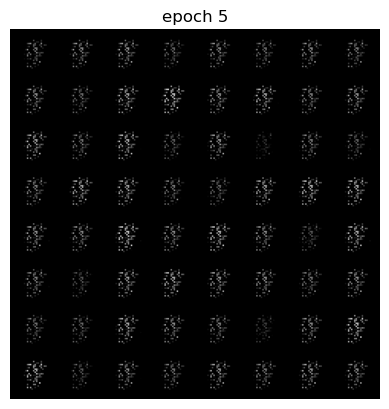

Epoch 5 of 100
Generator loss: 1.48545708, Discriminator loss: 1.33718831


118it [00:04, 29.25it/s]                         


Epoch 6 of 100
Generator loss: 1.23803480, Discriminator loss: 1.09703391


118it [00:03, 31.07it/s]                         


Epoch 7 of 100
Generator loss: 2.36776627, Discriminator loss: 1.23400213


118it [00:03, 30.70it/s]                         


Epoch 8 of 100
Generator loss: 1.46918253, Discriminator loss: 0.88853982


118it [00:03, 31.08it/s]                         


Epoch 9 of 100
Generator loss: 1.32649510, Discriminator loss: 1.15635096


118it [00:03, 30.84it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


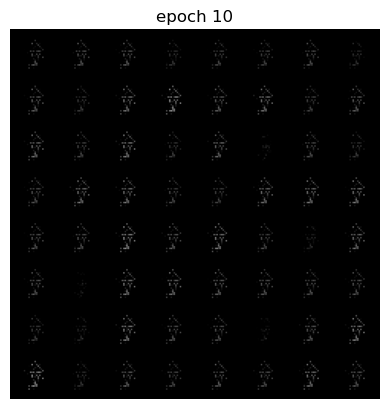

Epoch 10 of 100
Generator loss: 1.22099294, Discriminator loss: 1.01708627


118it [00:03, 30.93it/s]                         


Epoch 11 of 100
Generator loss: 2.27083137, Discriminator loss: 1.03024526


118it [00:03, 30.58it/s]                         


Epoch 12 of 100
Generator loss: 1.85962221, Discriminator loss: 1.06455878


118it [00:03, 30.94it/s]                         


Epoch 13 of 100
Generator loss: 1.51804224, Discriminator loss: 1.04350005


118it [00:03, 31.37it/s]                         


Epoch 14 of 100
Generator loss: 1.37201205, Discriminator loss: 1.04068417


118it [00:03, 30.73it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


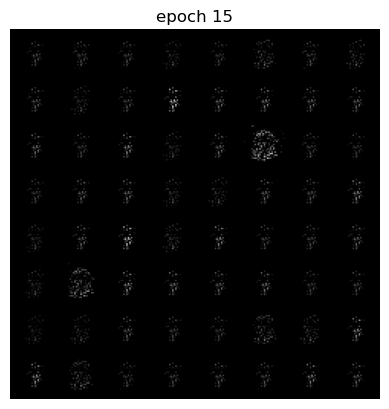

Epoch 15 of 100
Generator loss: 2.34957249, Discriminator loss: 0.70466692


118it [00:03, 30.76it/s]                         


Epoch 16 of 100
Generator loss: 2.55041234, Discriminator loss: 0.73011888


118it [00:03, 30.51it/s]                         


Epoch 17 of 100
Generator loss: 2.43088385, Discriminator loss: 0.75096216


118it [00:03, 30.22it/s]                         


Epoch 18 of 100
Generator loss: 2.63479493, Discriminator loss: 0.61782597


118it [00:03, 30.72it/s]                         


Epoch 19 of 100
Generator loss: 2.59953544, Discriminator loss: 0.75081247


118it [00:03, 30.61it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


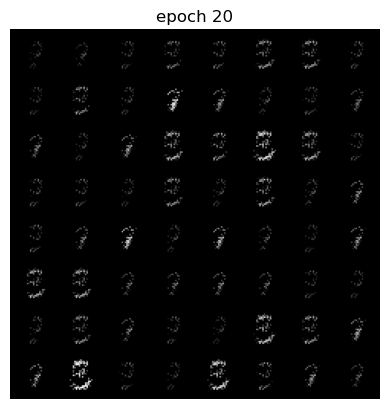

Epoch 20 of 100
Generator loss: 3.40931640, Discriminator loss: 0.46057294


118it [00:03, 30.59it/s]                         


Epoch 21 of 100
Generator loss: 3.45915431, Discriminator loss: 0.45212495


118it [00:03, 30.44it/s]                         


Epoch 22 of 100
Generator loss: 3.16109049, Discriminator loss: 0.69232591


118it [00:03, 30.62it/s]                         


Epoch 23 of 100
Generator loss: 2.02942135, Discriminator loss: 0.86778534


118it [00:03, 30.24it/s]                         


Epoch 24 of 100
Generator loss: 2.93868456, Discriminator loss: 0.60702284


118it [00:03, 30.49it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


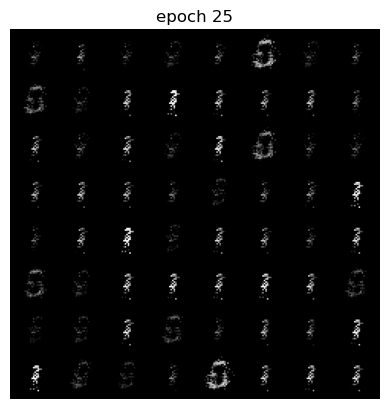

Epoch 25 of 100
Generator loss: 2.65720752, Discriminator loss: 0.67523508


118it [00:03, 30.62it/s]                         


Epoch 26 of 100
Generator loss: 3.30188349, Discriminator loss: 0.46648247


118it [00:03, 30.53it/s]                         


Epoch 27 of 100
Generator loss: 3.05615616, Discriminator loss: 0.52260172


118it [00:03, 30.68it/s]                         


Epoch 28 of 100
Generator loss: 2.32228520, Discriminator loss: 0.66852840


118it [00:03, 30.56it/s]                         


Epoch 29 of 100
Generator loss: 2.91275900, Discriminator loss: 0.48617240


118it [00:03, 30.25it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


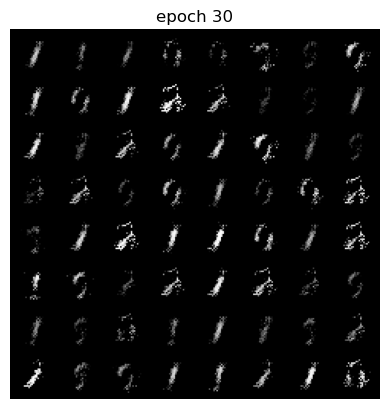

Epoch 30 of 100
Generator loss: 2.89637770, Discriminator loss: 0.53910521


118it [00:03, 30.63it/s]                         


Epoch 31 of 100
Generator loss: 2.47251008, Discriminator loss: 0.64610030


118it [00:03, 30.67it/s]                         


Epoch 32 of 100
Generator loss: 2.53322107, Discriminator loss: 0.65918752


118it [00:03, 30.76it/s]                         


Epoch 33 of 100
Generator loss: 2.42073473, Discriminator loss: 0.62489650


118it [00:03, 30.56it/s]                         


Epoch 34 of 100
Generator loss: 2.70192776, Discriminator loss: 0.55800417


118it [00:03, 30.61it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


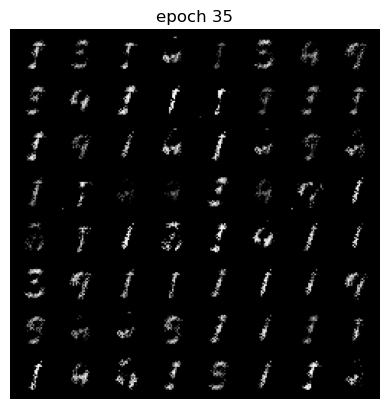

Epoch 35 of 100
Generator loss: 2.88256614, Discriminator loss: 0.58208423


118it [00:03, 30.20it/s]                         


Epoch 36 of 100
Generator loss: 2.65075682, Discriminator loss: 0.61121282


118it [00:03, 30.51it/s]                         


Epoch 37 of 100
Generator loss: 2.54655894, Discriminator loss: 0.61400109


118it [00:03, 30.80it/s]                         


Epoch 38 of 100
Generator loss: 2.32820825, Discriminator loss: 0.73121110


118it [00:03, 30.49it/s]                         


Epoch 39 of 100
Generator loss: 2.41552136, Discriminator loss: 0.63150481


118it [00:03, 30.72it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


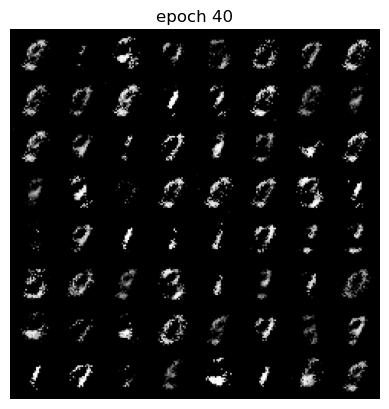

Epoch 40 of 100
Generator loss: 2.50325990, Discriminator loss: 0.55627415


118it [00:03, 30.61it/s]                         


Epoch 41 of 100
Generator loss: 2.55467584, Discriminator loss: 0.62010490


118it [00:03, 30.32it/s]                         


Epoch 42 of 100
Generator loss: 2.38887113, Discriminator loss: 0.64795149


118it [00:03, 30.60it/s]                         


Epoch 43 of 100
Generator loss: 2.43263189, Discriminator loss: 0.68784378


118it [00:03, 30.68it/s]                         


Epoch 44 of 100
Generator loss: 2.35579556, Discriminator loss: 0.70893008


118it [00:03, 30.77it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


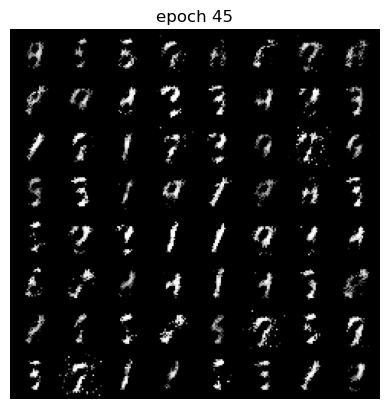

Epoch 45 of 100
Generator loss: 2.35297645, Discriminator loss: 0.65548057


118it [00:03, 30.68it/s]                         


Epoch 46 of 100
Generator loss: 2.29648660, Discriminator loss: 0.65814974


118it [00:03, 30.75it/s]                         


Epoch 47 of 100
Generator loss: 2.33630243, Discriminator loss: 0.65645763


118it [00:03, 30.88it/s]                         


Epoch 48 of 100
Generator loss: 2.32561981, Discriminator loss: 0.67049328


118it [00:03, 29.90it/s]                         


Epoch 49 of 100
Generator loss: 2.03661946, Discriminator loss: 0.73018856


118it [00:03, 30.47it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


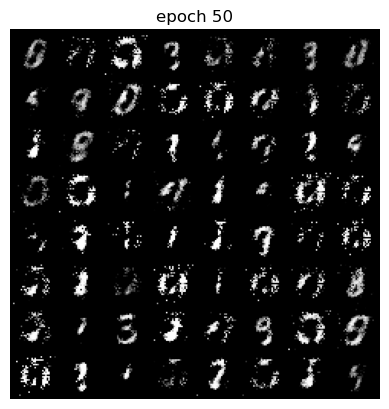

Epoch 50 of 100
Generator loss: 2.12785178, Discriminator loss: 0.74721782


118it [00:03, 30.25it/s]                         


Epoch 51 of 100
Generator loss: 2.26754119, Discriminator loss: 0.63543489


118it [00:03, 30.50it/s]                         


Epoch 52 of 100
Generator loss: 2.27400735, Discriminator loss: 0.66372218


118it [00:03, 29.66it/s]                         


Epoch 53 of 100
Generator loss: 2.56933204, Discriminator loss: 0.69014284


118it [00:03, 30.24it/s]                         


Epoch 54 of 100
Generator loss: 2.28535317, Discriminator loss: 0.77432118


118it [00:03, 29.72it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


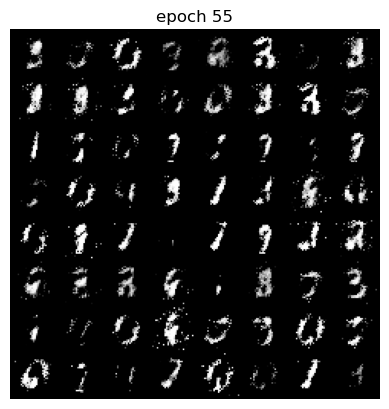

Epoch 55 of 100
Generator loss: 1.84095619, Discriminator loss: 0.83584434


118it [00:04, 29.48it/s]                         


Epoch 56 of 100
Generator loss: 2.23327431, Discriminator loss: 0.65125075


118it [00:03, 30.45it/s]                         


Epoch 57 of 100
Generator loss: 2.31518195, Discriminator loss: 0.67696363


118it [00:03, 30.18it/s]                         


Epoch 58 of 100
Generator loss: 2.12402495, Discriminator loss: 0.71531035


118it [00:03, 30.34it/s]                         


Epoch 59 of 100
Generator loss: 2.33467610, Discriminator loss: 0.69610576


118it [00:03, 30.39it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


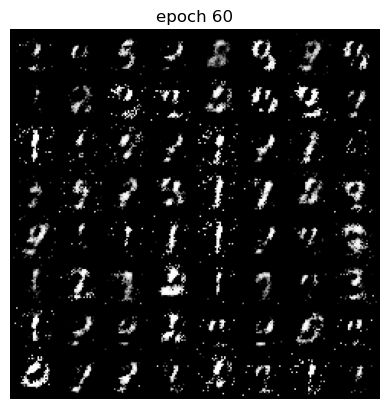

Epoch 60 of 100
Generator loss: 2.34453953, Discriminator loss: 0.65528477


118it [00:03, 29.80it/s]                         


Epoch 61 of 100
Generator loss: 2.38941456, Discriminator loss: 0.67450629


118it [00:03, 30.49it/s]                         


Epoch 62 of 100
Generator loss: 2.10856549, Discriminator loss: 0.79286880


118it [00:03, 30.38it/s]                         


Epoch 63 of 100
Generator loss: 2.20636750, Discriminator loss: 0.72509621


118it [00:03, 30.15it/s]                         


Epoch 64 of 100
Generator loss: 2.14530528, Discriminator loss: 0.78663687


118it [00:03, 30.37it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


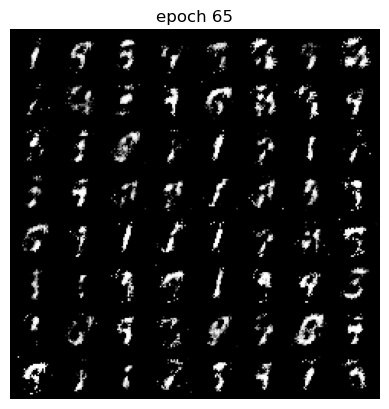

Epoch 65 of 100
Generator loss: 2.26642138, Discriminator loss: 0.66919633


118it [00:03, 30.40it/s]                         


Epoch 66 of 100
Generator loss: 2.50483014, Discriminator loss: 0.66107718


118it [00:03, 30.28it/s]                         


Epoch 67 of 100
Generator loss: 2.27894977, Discriminator loss: 0.71287046


118it [00:03, 30.49it/s]                         


Epoch 68 of 100
Generator loss: 2.10499763, Discriminator loss: 0.76479588


118it [00:03, 30.73it/s]                         


Epoch 69 of 100
Generator loss: 2.00464084, Discriminator loss: 0.78482302


118it [00:03, 30.60it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


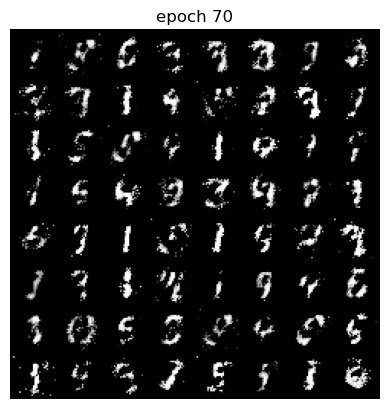

Epoch 70 of 100
Generator loss: 2.03821954, Discriminator loss: 0.80287200


118it [00:03, 30.90it/s]                         


Epoch 71 of 100
Generator loss: 2.03892584, Discriminator loss: 0.83502199


118it [00:03, 30.79it/s]                         


Epoch 72 of 100
Generator loss: 1.82730391, Discriminator loss: 0.86358753


118it [00:03, 30.32it/s]                         


Epoch 73 of 100
Generator loss: 1.71847361, Discriminator loss: 0.85803315


118it [00:03, 30.90it/s]                         


Epoch 74 of 100
Generator loss: 1.70893699, Discriminator loss: 0.89541687


118it [00:03, 30.78it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


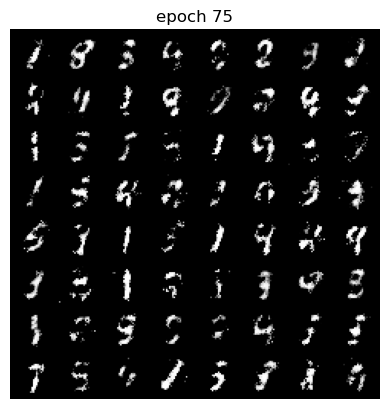

Epoch 75 of 100
Generator loss: 1.75435294, Discriminator loss: 0.84422626


118it [00:03, 30.93it/s]                         


Epoch 76 of 100
Generator loss: 1.82337426, Discriminator loss: 0.82946782


118it [00:03, 30.68it/s]                         


Epoch 77 of 100
Generator loss: 1.78662257, Discriminator loss: 0.83957681


118it [00:03, 30.83it/s]                         


Epoch 78 of 100
Generator loss: 1.69870136, Discriminator loss: 0.87234340


118it [00:03, 30.42it/s]                         


Epoch 79 of 100
Generator loss: 1.81323250, Discriminator loss: 0.83546303


118it [00:03, 30.89it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


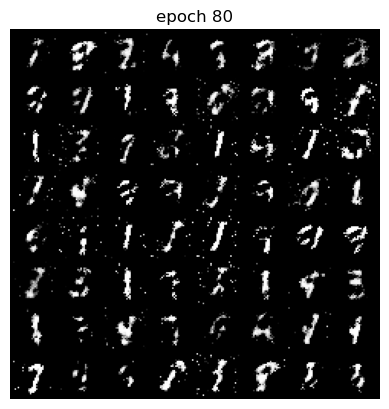

Epoch 80 of 100
Generator loss: 1.80010450, Discriminator loss: 0.85657800


118it [00:03, 31.01it/s]                         


Epoch 81 of 100
Generator loss: 1.74864439, Discriminator loss: 0.85480557


118it [00:03, 30.72it/s]                         


Epoch 82 of 100
Generator loss: 1.67144316, Discriminator loss: 0.89206275


118it [00:03, 31.00it/s]                         


Epoch 83 of 100
Generator loss: 1.57681992, Discriminator loss: 0.97438105


118it [00:03, 30.39it/s]                         


Epoch 84 of 100
Generator loss: 1.66888450, Discriminator loss: 0.87490120


118it [00:03, 30.66it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


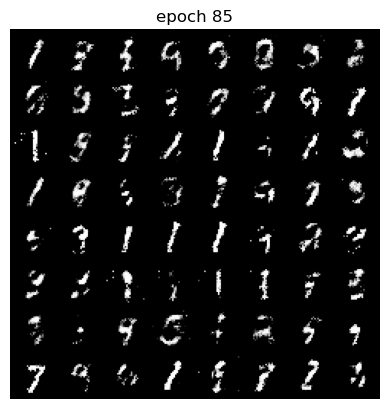

Epoch 85 of 100
Generator loss: 1.66560912, Discriminator loss: 0.88325212


118it [00:03, 30.88it/s]                         


Epoch 86 of 100
Generator loss: 1.65423994, Discriminator loss: 0.90407655


118it [00:05, 22.42it/s]                         


Epoch 87 of 100
Generator loss: 1.75494693, Discriminator loss: 0.88238622


118it [00:05, 22.08it/s]                         


Epoch 88 of 100
Generator loss: 1.76583934, Discriminator loss: 0.87057860


118it [00:05, 21.99it/s]                         


Epoch 89 of 100
Generator loss: 1.68931870, Discriminator loss: 0.92147321


118it [00:04, 23.79it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


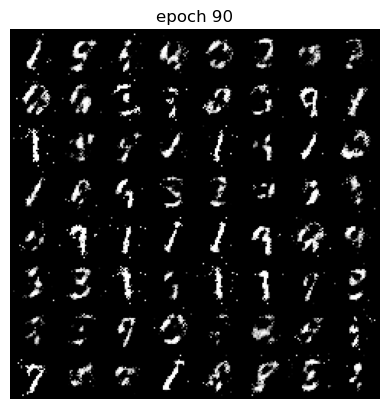

Epoch 90 of 100
Generator loss: 1.58559160, Discriminator loss: 0.91445654


118it [00:05, 23.28it/s]                         


Epoch 91 of 100
Generator loss: 1.70011563, Discriminator loss: 0.86272620


118it [00:04, 24.14it/s]                         


Epoch 92 of 100
Generator loss: 1.87672275, Discriminator loss: 0.86305894


118it [00:05, 21.87it/s]                         


Epoch 93 of 100
Generator loss: 1.76943255, Discriminator loss: 0.85709300


118it [00:04, 28.86it/s]                         


Epoch 94 of 100
Generator loss: 1.66295221, Discriminator loss: 0.87434761


118it [00:03, 29.63it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


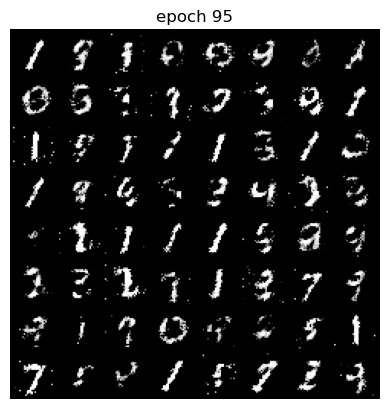

Epoch 95 of 100
Generator loss: 1.72879671, Discriminator loss: 0.89337146


118it [00:04, 29.43it/s]                         


Epoch 96 of 100
Generator loss: 1.73075706, Discriminator loss: 0.91268009


118it [00:04, 29.29it/s]                         


Epoch 97 of 100
Generator loss: 1.64664691, Discriminator loss: 0.90112821


118it [00:04, 29.44it/s]                         


Epoch 98 of 100
Generator loss: 1.69006080, Discriminator loss: 0.88023123


118it [00:04, 29.49it/s]                         


Epoch 99 of 100
Generator loss: 1.68489129, Discriminator loss: 0.91479132


118it [00:04, 29.48it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


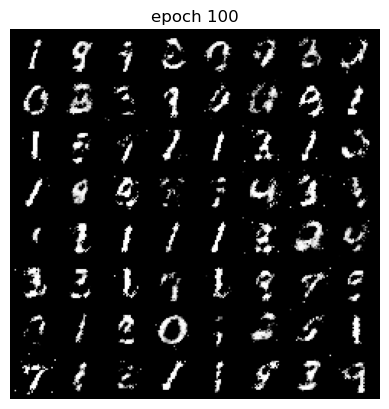

Epoch 100 of 100
Generator loss: 1.71718812, Discriminator loss: 0.90110569


In [31]:
torch.manual_seed(7777)

def generator_loss():
    ############ YOUR CODE HERE ##########
    gen_loss = 0
    gen_noise = create_noise(sample_size, nz)
    # for z in gen_noise:
    #     gen_loss += -torch.log(discriminator(generator(z))) / len(gen_noise)

    gen_loss = criterion(discriminator(generator(gen_noise)), torch.ones(sample_size, 1))
        
    return gen_loss
    
    
    ######################################
    
def discriminator_loss(data, true_label):
    ############ YOUR CODE HERE ##########
    disc_noise = create_noise(sample_size, nz)

    error_real = criterion(discriminator(data), torch.ones(sample_size, 1))
    error_fake = criterion(discriminator(generator(disc_noise)), torch.zeros(sample_size, 1))

    disc_loss = error_fake + error_real
        
    return disc_loss
    
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ##########
        batch_data, batch_labels = data

        perm = torch.randperm(len(batch_data))
        idx = perm[:sample_size]
        samples = batch_data[idx]
        labels = batch_labels[idx]
        
        optim_d.zero_grad()
        loss_d_curr = discriminator_loss(samples, labels)
        loss_d_curr.backward()
        optim_d.step()
        
        optim_g.zero_grad()
        loss_g_curr = generator_loss()
        loss_g_curr.backward()
        optim_g.step()
        
        loss_d += loss_d_curr.item()
        loss_g += loss_g_curr.item() 
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [32]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [33]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

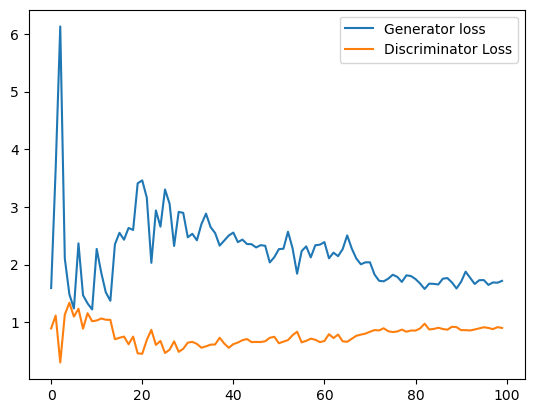

In [34]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')